# Pancreatic Cancer Risk Identification and Treatment Recommendation Project

## Introduction and Background

Pancreatic cancer is one of the most lethal malignancies worldwide, with a five-year survival rate of less than 10% due to its late diagnosis and aggressive progression. Accurate prediction of patient survival at the time of diagnosis remains a critical challenge in oncology, limiting clinicians’ ability to personalize treatment and allocate resources effectively. With the increasing availability of clinical and genomic data, there is a growing opportunity to leverage machine learning to estimate patient outcomes and support evidence-based decision-making.


## Problem Statement

Pancreatic cancer is often diagnosed late and is difficult to treat, making it one of the deadliest cancers. Doctors lack accurate tools to predict how long a patient might survive, which limits personalized care. Although there is a lot of clinical and genomic data available, survival is still mainly predicted using general staging systems. This project aims to build a machine learning model that can better predict survival in pancreatic cancer patients, helping doctors make more informed decisions.

By identifying high-risk individuals early, this tool can support treatment planning, improve patient counseling, and guide the selection of candidates for advanced therapies or clinical trials.

## Project Objectives

1.	Filter and isolate pancreatic cancer patient data from a larger clinical-genomic dataset to create a focused, high-quality subset for analysis.
2.	Preprocess and engineer features from clinical, pathological, and genomic variables such as tumor mutational burden (TMB), tumor purity, disease stage, and demographic data.
3.	Build a predictive machine learning model to estimate the overall survival status (alive vs. deceased) of pancreatic cancer patients at the time of sample collection or diagnosis.
4.	Evaluate model performance using classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure clinical relevance and reliability.
5.	Interpret model outputs to identify the most influential features contributing to survival predictions, thereby providing insights into potential prognostic biomarkers.
6.	Demonstrate potential clinical utility by outlining how the model could support risk stratification, personalized treatment planning, and early patient counseling in real-world oncology settings.


## 1. Data Understanding

MSK-CHORD (MSK, Nature 2024)
The dataset was sourced from the MSK CHORD 2024 clinical-genomic database, which includes over 25,000 different cancer cases.

A subset of 3,109 records corresponding to patients with pancreatic cancer was extracted based on the Cancer Type column.
Targeted sequencing of 25,040 tumors from 24,950 patients and their matched normals via MSK-IMPACT, along with clinical annotations, some of which are derived from natural language processing (denoted NLP). This data is available under the Creative Commons BY-NC-ND 4.0 license.

Data Url: https://www.cbioportal.org/study/summary?id=msk_chord_2024

In [9]:
# importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import joblib 

from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [10]:
# Importing the dataset
df = pd.read_csv('msk_chord_2024_clinical_data.csv')

In [11]:
# Looking at the first 5 rows
df.head()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
0,msk_chord_2024,P-0000012,P-0000012-T02-IM3,No,No,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NaN,No,...,No,Tumor,2,344,Primary,Former/Current Smoker,Matched,Stage 1-3,1.109155,NaN
1,msk_chord_2024,P-0000012,P-0000012-T03-IM3,No,No,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,3B,Distant,No,...,No,Tumor,2,428,Metastasis,Former/Current Smoker,Matched,Stage 1-3,32.165504,NaN
2,msk_chord_2024,P-0000015,P-0000015-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,1,Localized,Yes,...,No,Tumor,1,281,Metastasis,Unknown,Matched,Stage 1-3,7.764087,40.0
3,msk_chord_2024,P-0000036,P-0000036-T01-IM3,No,Yes,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,4,Distant,No,...,No,Tumor,1,380,Primary,Never,Unmatched,Stage 4,7.764087,30.0
4,msk_chord_2024,P-0000041,P-0000041-T01-IM3,No,Yes,Breast Cancer,Breast Invasive Ductal Carcinoma,2A,Localized,Yes,...,No,Tumor,1,401,Primary,Unknown,Matched,Stage 1-3,11.091553,30.0


In [12]:
#looking at the last 5 rows
df.tail()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
25035,msk_chord_2024,P-0089665,P-0089665-T01-IM7,No,Yes,Breast Cancer,Invasive Breast Carcinoma,NaN,Distant Metastases/Systemic Disease,Yes,...,No,Tumor,1,690,Metastasis,Never,Matched,Stage 1-3,4.922083,70.0
25036,msk_chord_2024,P-0089672,P-0089672-T01-IM7,Unknown,Unknown,Breast Cancer,Breast Invasive Ductal Carcinoma,1A,Regional To Lymph Nodes,Unknown,...,Unknown,Tumor,1,426,Primary,Former/Current Smoker,Matched,Stage 1-3,0.820347,35.0
25037,msk_chord_2024,P-0089676,P-0089676-T01-IM7,Unknown,Unknown,Breast Cancer,Breast Invasive Ductal Carcinoma,1B,NaN,Unknown,...,Unknown,Tumor,1,399,Primary,Never,Matched,Stage 1-3,2.461042,40.0
25038,msk_chord_2024,P-0089687,P-0089687-T01-IM7,No,No,Colorectal Cancer,Colon Adenocarcinoma,1,Localized,No,...,No,Tumor,1,576,Primary,Former/Current Smoker,Matched,Stage 1-3,9.844167,40.0
25039,msk_chord_2024,P-0089690,P-0089690-T01-IM7,No,Yes,Breast Cancer,Breast Invasive Lobular Carcinoma,4,Distant Metastases/Systemic Disease,No,...,No,Tumor,1,498,Primary,Never,Matched,Stage 4,7.383125,30.0


In [13]:
#We shall then review the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25040 entries, 0 to 25039
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Study ID                                25040 non-null  object 
 1   Patient ID                              25040 non-null  object 
 2   Sample ID                               25040 non-null  object 
 3   Tumor Site: Adrenal Glands (NLP)        25040 non-null  object 
 4   Tumor Site: Bone (NLP)                  25040 non-null  object 
 5   Cancer Type                             25040 non-null  object 
 6   Cancer Type Detailed                    25040 non-null  object 
 7   Clinical Group                          20376 non-null  object 
 8   Clinical Summary                        24552 non-null  object 
 9   Tumor Site: CNS/Brain (NLP)             25040 non-null  object 
 10  Current Age                             25037 non-null  fl

In [14]:
# Looking at the shape of the dataset
df.shape

(25040, 53)

This shows the dataset has mostly float and object data. They are 25040 rows and 52 columns. The rows and columns will need to be selected and filtered to reduce the dataset and focus on Pancreatic cancer.

In [16]:
# Having an overview of all Numeric columns
df.describe()

,Current Age,Fraction Genome Altered,"Gleason Score, 1st Reported (NLP)","Gleason Score, Highest Reported (NLP)",Gleason Score Reported on Sample (NLP),MSI Score,Mutation Count,Number of Tumor Registry Entries,Overall Survival (Months),Number of Samples Per Patient,Sample coverage,TMB (nonsynonymous),Tumor Purity
count,25037.000000,24870.000000,3272.000000,3272.000000,2110.000000,24487.000000,23862.000000,25040.000000,25040.000000,25040.000000,25040.000000,25040.000000,24454.000000
mean,65.476655,0.180309,7.845355,7.981663,8.012322,1.438650,8.725756,1.315735,32.128503,1.007188,609.113099,7.258216,36.414452
std,12.683747,0.185514,1.022186,0.976473,0.942561,5.004455,19.416691,0.687179,25.712181,0.084481,213.755797,16.375452,19.201781
min,10.000000,0.000000,6.000000,6.000000,6.000000,-1.000000,1.000000,0.000000,0.032877,1.000000,23.000000,0.000000,0.000000
25%,57.000000,0.021100,7.000000,7.000000,7.000000,0.020000,3.000000,1.000000,11.145193,1.000000,470.000000,2.461042,20.000000
50%,67.000000,0.125800,8.000000,8.000000,8.000000,0.230000,5.000000,1.000000,24.657507,1.000000,598.000000,4.101736,30.000000
75%,75.000000,0.283900,9.000000,9.000000,9.000000,0.900000,8.000000,1.000000,49.183508,1.000000,737.000000,6.917585,50.000000
max,89.000000,1.000000,10.000000,10.000000,10.000000,53.530000,696.000000,10.000000,118.454665,2.000000,2610.000000,570.961677,95.000000


Understanding the columns:

- The Current Age: Patient age ranges from 10 to 89, with an average of 65.5 years.

-  Fraction Genome Altered: Represents how much of the genome is altered, ranging from 0 to 1.

-  Gleason Scores  Indicates prostate cancer severity generally ranges from 6 to 10.

-  MSI Score: Microsatellite Instability score.

- Mutation Count: Mutation events, ranging widely from 1 to 696.

- Number of Tumor Registry Entries: Most patients have 1, with a max of 10.

- Overall Survival : Ranges from near 0 to over 118 months.

- Number of Samples Per Patient: Usually 1, some with 2.

- Sample Coverage: Mean of 609, max up to 2610.

- (TMB) Tumor Mutational Burden mean of 7.26

- Tumor Purity: Ranges from 0 to 95%, with a mean of 36.4%.

## 2. Data Cleaning and Preprocessing

As our main focus is specifically on pancreatic cancer we shall therefore filter the dataset to include only patients diagnosed with this cancer type.

In [20]:
# Cancer types found in the dataset.
print(df['Cancer Type'].unique().tolist())

['Breast Cancer', 'Non-Small Cell Lung Cancer', 'Colorectal Cancer', 'Prostate Cancer', 'Pancreatic Cancer']


In [21]:
# Filtering for pancreatic cancer

pancreatic_cancer = df[df['Cancer Type'] == 'Pancreatic Cancer']

In [22]:
print("Shape of the new Pancreatic Cancer DataFrame:")

pancreatic_cancer.shape

Shape of the new Pancreatic Cancer DataFrame:


(3109, 53)

In [23]:
# Looking at the pancreatic cancer dataset
pancreatic_cancer.head()

,Study ID,Patient ID,Sample ID,Tumor Site: Adrenal Glands (NLP),Tumor Site: Bone (NLP),Cancer Type,Cancer Type Detailed,Clinical Group,Clinical Summary,Tumor Site: CNS/Brain (NLP),...,Tumor Site: Reproductive Organs (NLP),Sample Class,Number of Samples Per Patient,Sample coverage,Sample Type,Smoking History (NLP),Somatic Status,Stage (Highest Recorded),TMB (nonsynonymous),Tumor Purity
29,msk_chord_2024,P-0000142,P-0000142-T01-IM3,No,No,Pancreatic Cancer,Pancreatic Adenocarcinoma,2B,"Regional,Extension and Nodes",Yes,...,No,Tumor,1,639,Primary,Unknown,Matched,Stage 1-3,4.436621,40.0
76,msk_chord_2024,P-0000314,P-0000314-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,4,Distant,No,...,No,Tumor,1,883,Primary,Former/Current Smoker,Matched,Stage 4,7.764087,90.0
108,msk_chord_2024,P-0000421,P-0000421-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,4,Distant,Yes,...,No,Tumor,1,452,Metastasis,Never,Matched,Stage 4,0.000000,20.0
252,msk_chord_2024,P-0000783,P-0000783-T01-IM3,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,2B,"Regional,Extension and Nodes",No,...,No,Tumor,1,399,Primary,Unknown,Matched,Stage 1-3,5.545777,80.0
266,msk_chord_2024,P-0000825,P-0000825-T04-IM7,No,Yes,Pancreatic Cancer,Pancreatic Adenocarcinoma,1B,Localized,Yes,...,No,Tumor,2,518,Primary,Former/Current Smoker,Matched,Stage 1-3,6.562778,60.0


Based on our review of the columns: certain columns aren't neccessary for our study on the survival of pancreatic cancer. We shall therefore drop the columns in order to remain with our subject of focus.

In [25]:
#  Viewing the column list to analyse the necessary columns
print(pancreatic_cancer.columns)

Index(['Study ID', 'Patient ID', 'Sample ID',
       'Tumor Site: Adrenal Glands (NLP)', 'Tumor Site: Bone (NLP)',
       'Cancer Type', 'Cancer Type Detailed', 'Clinical Group',
       'Clinical Summary', 'Tumor Site: CNS/Brain (NLP)', 'Current Age',
       'Diagnosis Description', 'Ethnicity', 'Fraction Genome Altered', 'Sex',
       'Gene Panel', 'Gleason Score, 1st Reported (NLP)',
       'Gleason Score, Highest Reported (NLP)',
       'Gleason Score Reported on Sample (NLP)', 'HER2',
       'History for Positive PD-L1 (NLP)', 'HR', 'ICD-O Histology Description',
       'Tumor Site: Intra Abdominal', 'Tumor Site: Liver (NLP)',
       'Tumor Site: Lung (NLP)', 'Tumor Site: Lymph Node (NLP)',
       'Metastatic Site', 'MSI Comment', 'MSI Score', 'MSI Type',
       'Mutation Count', 'Number of Tumor Registry Entries', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status',
       'Tumor Site: Other (NLP)', 'Pathological Group',
       'Sample PD-L1 Positive (NL

In [26]:
# Dropping columns

columns_chosen = ['Patient ID',
  'Sample ID',
  'Cancer Type',
  'Cancer Type Detailed',
  'Overall Survival (Months)',
  'Overall Survival Status',
  'Clinical Summary',
  'Primary Tumor Site',
  'Current Age',
  'Sex',
  'Race',
  'Ethnicity',
  'Smoking History (NLP)',
  'Stage (Highest Recorded)',
  'Metastatic Site',
  'Tumor Purity',
  'TMB (nonsynonymous)',
  'Mutation Count',
  'Fraction Genome Altered',
]

pancreatic_cancer_filtered = pancreatic_cancer[columns_chosen].copy()
pancreatic_cancer_filtered.head()

,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Overall Survival (Months),Overall Survival Status,Clinical Summary,Primary Tumor Site,Current Age,Sex,Race,Ethnicity,Smoking History (NLP),Stage (Highest Recorded),Metastatic Site,Tumor Purity,TMB (nonsynonymous),Mutation Count,Fraction Genome Altered
29,P-0000142,P-0000142-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,8.810949,1:DECEASED,"Regional,Extension and Nodes",Pancreas,56.0,Female,White,Non-Spanish; Non-Hispanic,Unknown,Stage 1-3,NaN,40.0,4.436621,4.0,0.2681
76,P-0000314,P-0000314-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,33.731470,1:DECEASED,Distant,Pancreas,47.0,Male,White,Non-Spanish; Non-Hispanic,Former/Current Smoker,Stage 4,NaN,90.0,7.764087,7.0,0.3610
108,P-0000421,P-0000421-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,25.052027,1:DECEASED,Distant,Pancreas,69.0,Male,White,Non-Spanish; Non-Hispanic,Never,Stage 4,Lung,20.0,0.000000,NaN,0.0005
252,P-0000783,P-0000783-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,3.057531,1:DECEASED,"Regional,Extension and Nodes",Pancreas,64.0,Male,White,Non-Spanish; Non-Hispanic,Unknown,Stage 1-3,NaN,80.0,5.545777,5.0,0.4135
266,P-0000825,P-0000825-T04-IM7,Pancreatic Cancer,Pancreatic Adenocarcinoma,110.531386,0:LIVING,Localized,Pancreas,65.0,Female,Black Or African American,Non-Spanish; Non-Hispanic,Former/Current Smoker,Stage 1-3,NaN,60.0,6.562778,8.0,0.2843


In [27]:
# Ensuring that the same rows are maintained
pancreatic_cancer_filtered.shape

(3109, 19)

In [28]:
# Finding Nulls and Missing entries
pancreatic_cancer_filtered.isnull().sum()

Patient ID                      0
Sample ID                       0
Cancer Type                     0
Cancer Type Detailed            0
Overall Survival (Months)       0
Overall Survival Status         0
Clinical Summary               41
Primary Tumor Site              0
Current Age                     0
Sex                             0
Race                            0
Ethnicity                       0
Smoking History (NLP)           0
Stage (Highest Recorded)        0
Metastatic Site              1990
Tumor Purity                   27
TMB (nonsynonymous)             0
Mutation Count                154
Fraction Genome Altered        11
dtype: int64

We can identify that the following columns have missing values

1. Clinical Summary - This relates to the summary of where the cancer is
2. Metastatic Site - This relates to where the cancer has metastasized to (Spread to)
3. Tumor Purity - This realtes to the proportion of cancer cells within a tissue (expressed as a percentage)
4. Mutation Count - This relates to the number of DNA mutations within the tumor
5. Fraction Genome Altrered - This relates to the number of genome that have undergone mutations

From the above we can derive the following:

Clinical summary and Metastatic site are qualitative data while the rest of the data is quantitative in nature.

We shall therefore replace the clinical and metatstic missing valuables with (null) and the rest with the averages from their respective columns.

In [31]:
# Filled rows with N/A
pancreatic_cancer_filtered['Clinical Summary'].fillna('N/A', inplace= True)
pancreatic_cancer_filtered['Metastatic Site'].fillna('N/A', inplace= True)

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\1763140606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pancreatic_cancer_filtered['Clinical Summary'].fillna('N/A', inplace= True)
C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\1763140606.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [32]:
# Filled rows with means
pancreatic_cancer_filtered['Tumor Purity'].fillna(pancreatic_cancer_filtered['Tumor Purity'].mean(), inplace= True)
pancreatic_cancer_filtered['Mutation Count'].fillna(pancreatic_cancer_filtered['Mutation Count'].mean(), inplace = True)
pancreatic_cancer_filtered['Fraction Genome Altered'].fillna(pancreatic_cancer_filtered['Fraction Genome Altered'].mean(), inplace = True)

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\4162834990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pancreatic_cancer_filtered['Tumor Purity'].fillna(pancreatic_cancer_filtered['Tumor Purity'].mean(), inplace= True)
C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\4162834990.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

In [33]:
pancreatic_cancer_filtered.isnull().sum()

Patient ID                   0
Sample ID                    0
Cancer Type                  0
Cancer Type Detailed         0
Overall Survival (Months)    0
Overall Survival Status      0
Clinical Summary             0
Primary Tumor Site           0
Current Age                  0
Sex                          0
Race                         0
Ethnicity                    0
Smoking History (NLP)        0
Stage (Highest Recorded)     0
Metastatic Site              0
Tumor Purity                 0
TMB (nonsynonymous)          0
Mutation Count               0
Fraction Genome Altered      0
dtype: int64

## 3. Exploratory Data Analysis

Following our review of the data and selecting the relevant columns for our analysis. We will look into key patient characteristics, treatment factors, and clinical variables associated with pancreatic cancer. We will explore feature distributions, and potential relationships between variables and survival outcomes.

EDA Objectives

- Understand feature distributions (e.g., age, stage, mutation count)
- Examine survival status distribution
- Explore relationships between features and survival outcome
- Detect any anomalies, imbalances, or feature engineering opportunities

## 3.1 Descriptive statistics

An overview of the types of cancer under pancreatic

In [38]:
#Types of pancreatic cancer in the dataset

pancreatic_cancer_types = pancreatic_cancer['Cancer Type Detailed'].unique().tolist()

print("Unique Pancreatic Cancer Types:")
pancreatic_cancer_types

Unique Pancreatic Cancer Types:


['Pancreatic Adenocarcinoma',
 'Pancreatic Neuroendocrine Tumor',
 'Acinar Cell Carcinoma of the Pancreas',
 'Adenosquamous Carcinoma of the Pancreas',
 'Solid Pseudopapillary Neoplasm of the Pancreas',
 'Undifferentiated Carcinoma of the Pancreas',
 'Mucinous Cystic Neoplasm',
 'Pancreatoblastoma',
 'Intraductal Papillary Mucinous Neoplasm',
 'Osteoclastic Giant Cell Tumor',
 'Pancreatic Neuroendocrine Carcinoma',
 'Intraductal Tubulopapillary Neoplasm']

In [39]:
#Count of patients and pancreatic cancer types

# Get the value counts for Cancer Type Detailed
cancer_type_counts = pancreatic_cancer['Cancer Type Detailed'].value_counts()

print("Number of patients per Pancreatic Cancer type:")
cancer_type_counts

Number of patients per Pancreatic Cancer type:


Cancer Type Detailed
Pancreatic Adenocarcinoma                         2703
Pancreatic Neuroendocrine Tumor                    259
Adenosquamous Carcinoma of the Pancreas             50
Acinar Cell Carcinoma of the Pancreas               43
Undifferentiated Carcinoma of the Pancreas          25
Intraductal Papillary Mucinous Neoplasm             10
Pancreatic Neuroendocrine Carcinoma                  7
Solid Pseudopapillary Neoplasm of the Pancreas       5
Pancreatoblastoma                                    3
Mucinous Cystic Neoplasm                             2
Osteoclastic Giant Cell Tumor                        1
Intraductal Tubulopapillary Neoplasm                 1
Name: count, dtype: int64

## 3.2 Data Visualization

### A. Target Variable Analysis: Survival Status

We shall examine the survivability of patients with the disease and asses how fatal it is.

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\3397814963.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Survival Status', data=pancreatic_cancer_filtered, palette='viridis')


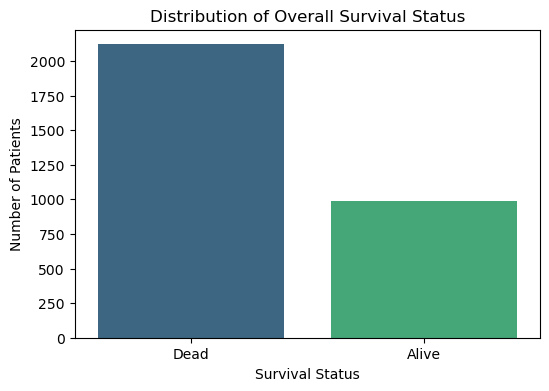

Survival Status Distribution:


Overall Survival Status
1:DECEASED    2120
0:LIVING       989
Name: count, dtype: int64

In [43]:
#Investigating the distribution between dead and alive patients

survival_counts = pancreatic_cancer_filtered['Overall Survival Status'].value_counts()

plt.figure(figsize=(6, 4))
sns.countplot(x='Overall Survival Status', data=pancreatic_cancer_filtered, palette='viridis')
plt.title('Distribution of Overall Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['Dead', 'Alive'])
plt.show()

print("Survival Status Distribution:")
survival_counts

In [44]:
#Compute the survival rate based on the data

# Calculating the survival rate
survival_rate = (pancreatic_cancer_filtered['Overall Survival Status'].value_counts()['0:LIVING'] / len(pancreatic_cancer_filtered)) * 100

print(f"Overall Survival Rate: {survival_rate:.2f}%")

Overall Survival Rate: 31.81%


This shows us the survival rate for pancreatic cancer being 32% once the patient has been diagnosed.

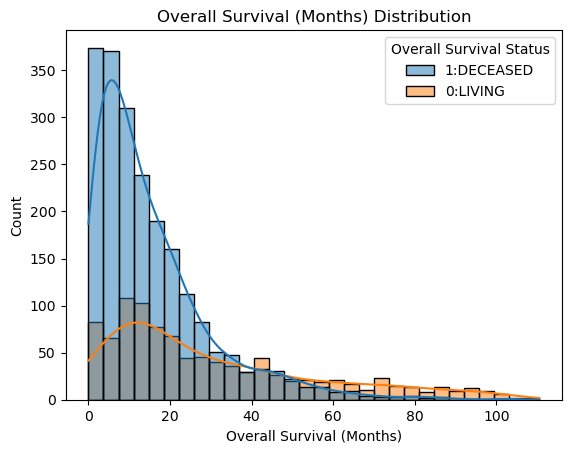

In [46]:
# Survival in months
sns.histplot(data=pancreatic_cancer_filtered, x='Overall Survival (Months)', bins=30, kde=True, hue='Overall Survival Status')
plt.title('Overall Survival (Months) Distribution')
plt.show()

In [47]:
#Computing the average of a patient survival in months

survival_months_stats = pancreatic_cancer_filtered['Overall Survival (Months)'].describe()
print("\nOverall Survival (Months) Statistics:")
print(survival_months_stats)

average_survival_months = pancreatic_cancer_filtered['Overall Survival (Months)'].mean()
print(f"\nAverage Survival in Months: {average_survival_months:.2f}")


Overall Survival (Months) Statistics:
count    3109.000000
mean       20.222603
std        20.106376
min         0.032877
25%         6.476705
50%        13.643821
75%        26.498601
max       110.531386
Name: Overall Survival (Months), dtype: float64

Average Survival in Months: 20.22


Therefore an average patient has a survival time of 1 Year and 8 months after testing positive for pancreatic cancer.

### B. Demographic Analysis

We shall investigate the age and ethnicity to assess the distribution of the cancer type

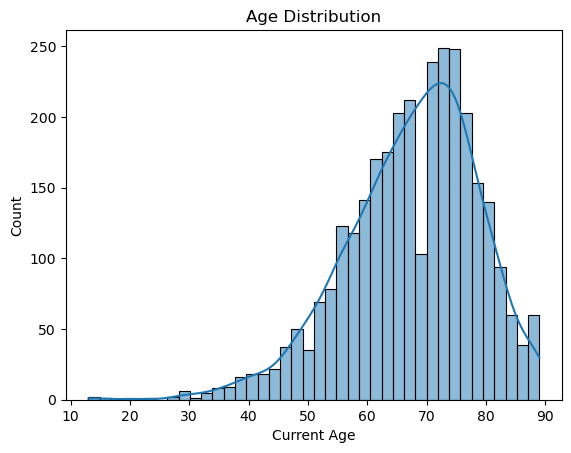

In [51]:
# Showing the age distribution of the patients
sns.histplot(data=pancreatic_cancer_filtered, x='Current Age', kde=True)
plt.title('Age Distribution')
plt.show()

In [52]:
#Calculating the average age of pancreatic patients

average_age = pancreatic_cancer_filtered['Current Age'].mean()
print(f"Average age of pancreatic patients: {average_age:.2f} years")

Average age of pancreatic patients: 67.50 years


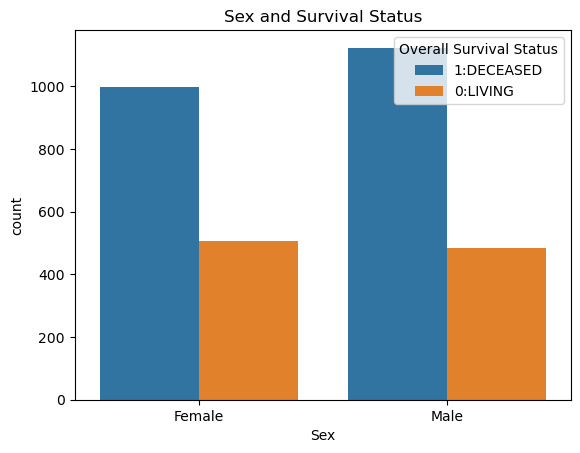

In [53]:
# Sex vs survival
sns.countplot(x='Sex', hue='Overall Survival Status', data=pancreatic_cancer_filtered)
plt.title('Sex and Survival Status')
plt.show()

The distribution of pancreatic cancer is relatively equal between genders, with the majority of patients not surviving the disease.

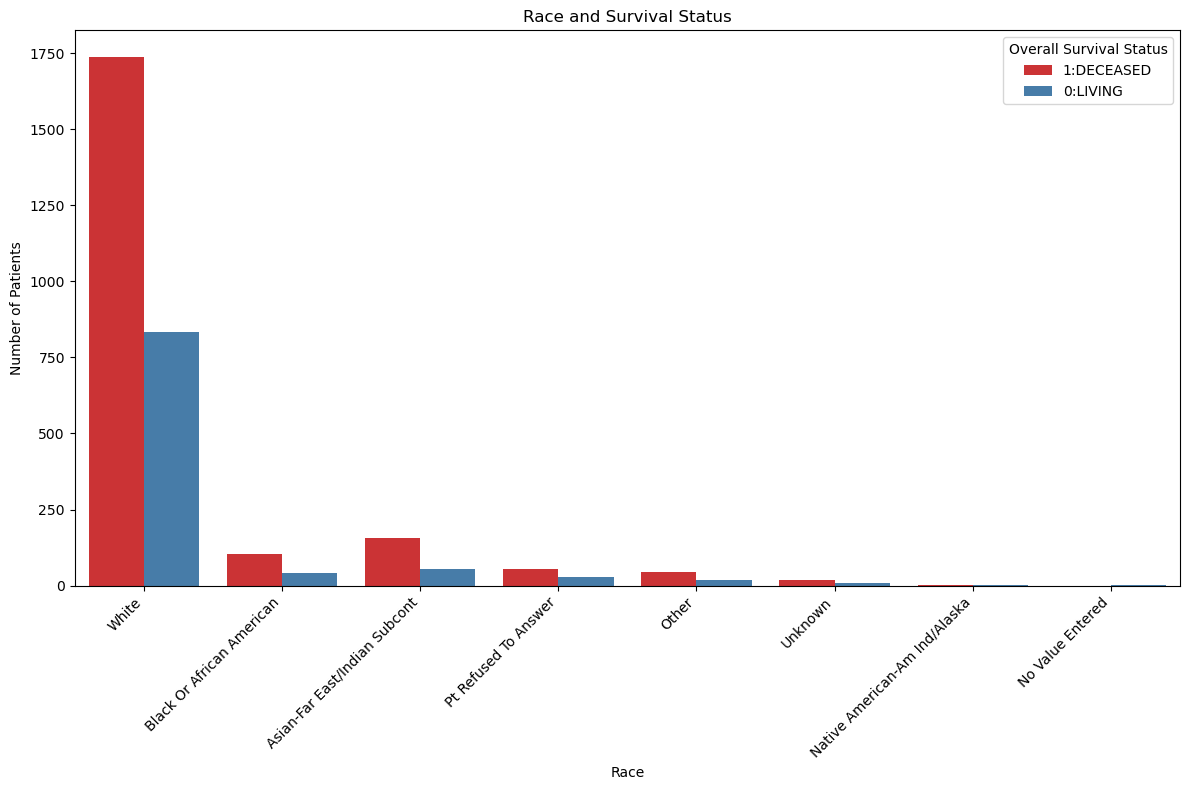

In [55]:
# Observing how different races are affected

# Race vs survival
plt.figure(figsize=(12, 8))
sns.countplot(x='Race', hue='Overall Survival Status', data=pancreatic_cancer_filtered, palette='Set1')
plt.title('Race and Survival Status')
plt.xlabel('Race')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Calculate survival counts and rates per race
race_survival_counts = pancreatic_cancer_filtered.groupby(['Race', 'Overall Survival Status']).size().unstack(fill_value=0)
race_survival_counts['Total'] = race_survival_counts['0:LIVING'] + race_survival_counts['1:DECEASED']
race_survival_counts['Survival Rate (%)'] = (race_survival_counts['0:LIVING'] / race_survival_counts['Total']) * 100

print("\nRace vs. Survival Status Counts and Rates:")
print(race_survival_counts)


Race vs. Survival Status Counts and Rates:
Overall Survival Status        0:LIVING  1:DECEASED  Total  Survival Rate (%)
Race                                                                         
Asian-Far East/Indian Subcont        56         157    213          26.291080
Black Or African American            40         104    144          27.777778
Native American-Am Ind/Alaska         2           2      4          50.000000
No Value Entered                      1           0      1         100.000000
Other                                20          46     66          30.303030
Pt Refused To Answer                 29          54     83          34.939759
Unknown                               7          19     26          26.923077
White                               834        1738   2572          32.426128


In [57]:
#Observing how different ethnicities are affected

# Ethnicity and Survival
ethnicity_survival_counts = pancreatic_cancer_filtered.groupby(['Ethnicity', 'Overall Survival Status']).size().unstack(fill_value=0)
ethnicity_survival_counts['Total'] = ethnicity_survival_counts['0:LIVING'] + ethnicity_survival_counts['1:DECEASED']
ethnicity_survival_counts['Survival Rate (%)'] = (ethnicity_survival_counts['0:LIVING'] / ethnicity_survival_counts['Total']) * 100

print("\nEthnicity vs. Survival Status Counts and Rates:")
ethnicity_survival_counts



Ethnicity vs. Survival Status Counts and Rates:


Overall Survival Status,0:LIVING,1:DECEASED,Total,Survival Rate (%)
Ethnicity,,,,
Cuban,1,1,2,50.000000
Dominican Republic,1,7,8,12.500000
Mexican (includes Chicano),0,1,1,0.000000
Non-Spanish; Non-Hispanic,888,1907,2795,31.771020
Other Spanish/Hispanic(incl European; excl Dom Rep,1,0,1,100.000000
Puerto Rican,4,6,10,40.000000
South/Central America (except Brazil),7,15,22,31.818182
"Spanish NOS; Hispanic NOS, Latino NOS",51,103,154,33.116883
Unknown whether Spanish or not,36,80,116,31.034483


### C. Tumor and Genomic Characteristics

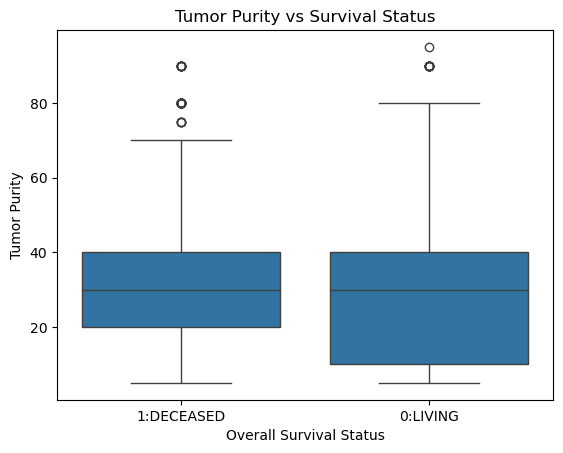

In [59]:
pancreatic_cancer_filtered['Tumor Purity'] = pd.to_numeric(pancreatic_cancer_filtered['Tumor Purity'], errors='coerce')

# Tumor Purity
sns.boxplot(x='Overall Survival Status', y='Tumor Purity', data=pancreatic_cancer_filtered)
plt.title('Tumor Purity vs Survival Status')
plt.show()

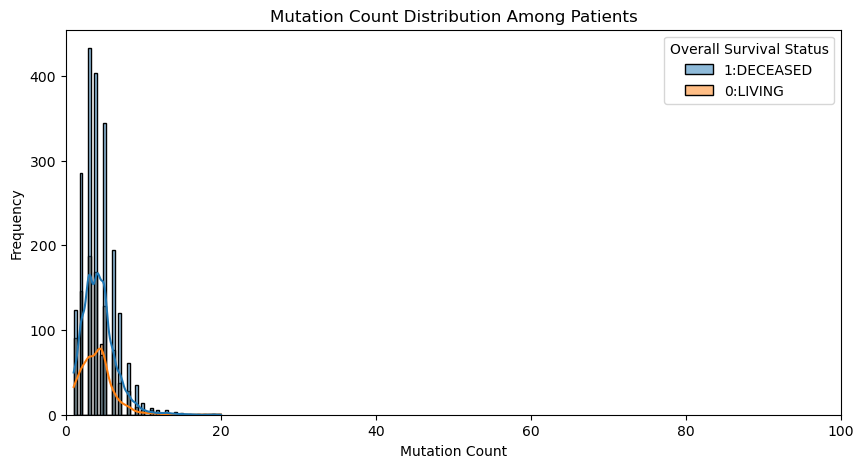

In [60]:
#Showing a histogram indicating mutation count

# Mutation Count
plt.figure(figsize=(10, 5))
sns.histplot(data= pancreatic_cancer_filtered[pancreatic_cancer_filtered['Mutation Count'] <= 20], x='Mutation Count', bins=50, kde=True, hue='Overall Survival Status')
plt.title('Mutation Count Distribution Among Patients')
plt.xlabel('Mutation Count')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

In [61]:
#Showing mutation count statistics among dead and living patients

mutation_counts_by_status = pancreatic_cancer_filtered.groupby('Overall Survival Status')['Mutation Count'].describe()

print("\nMutation Count Statistics by Survival Status:")
mutation_counts_by_status


Mutation Count Statistics by Survival Status:


,count,mean,std,min,25%,50%,75%,max
Overall Survival Status,,,,,,,,
0:LIVING,989.0,4.845800,7.857904,1.0,3.0,4.0,5.0,150.0
1:DECEASED,2120.0,4.532975,5.707814,1.0,3.0,4.0,5.0,168.0


The mutation count distributions for both survival groups are quite similar in shape and range. This suggests that mutation count alone may not strongly differentiate between living and deceased patients.

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\340550744.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Overall Survival Status', y='Fraction Genome Altered', data=pancreatic_cancer_filtered, palette='pastel')


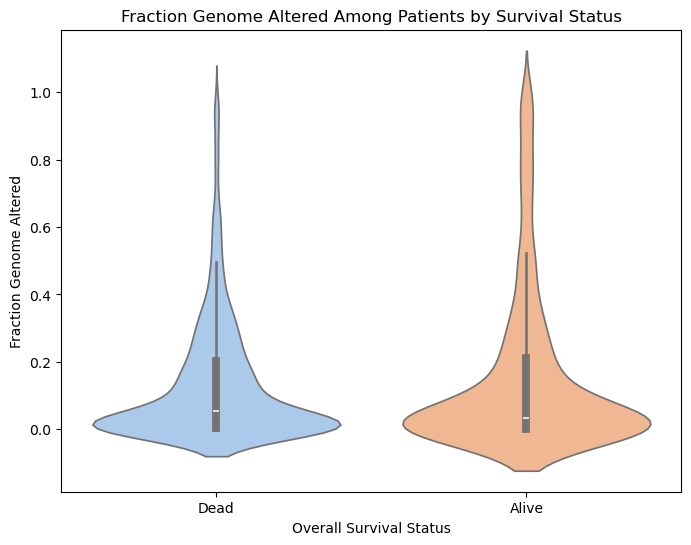

In [63]:
#Genome Alteration using the fraction genome altered

#We shall use the violin plot to show fraction genome altered among patients

# Fraction Genome Altered
plt.figure(figsize=(8, 6))
sns.violinplot(x='Overall Survival Status', y='Fraction Genome Altered', data=pancreatic_cancer_filtered, palette='pastel')
plt.title('Fraction Genome Altered Among Patients by Survival Status')
plt.xlabel('Overall Survival Status')
plt.ylabel('Fraction Genome Altered')
plt.xticks(ticks=[0, 1], labels=['Dead', 'Alive'])
plt.show()

This indicates that there is a higher distribution of genome alteration among dead patients making this a good basis to test our model on.

### D. Clinical Staging & Smoking History

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\2683815211.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stage (Highest Recorded)', data=pancreatic_cancer_filtered, palette='Set2', order=sorted(pancreatic_cancer_filtered['Stage (Highest Recorded)'].unique()))


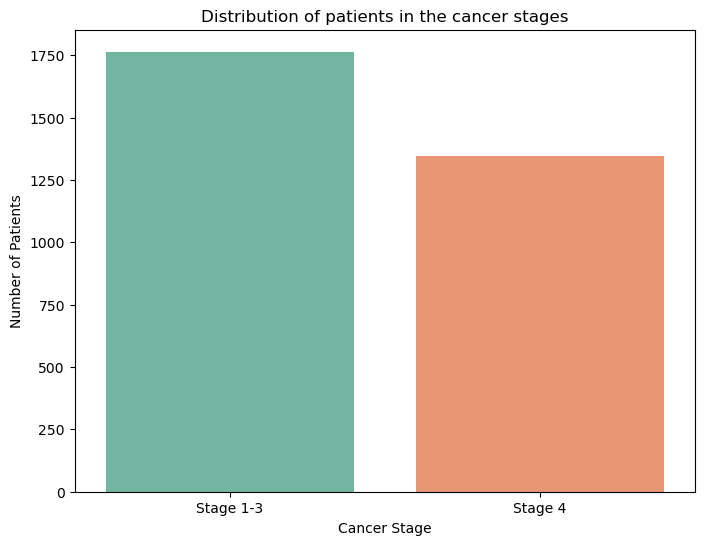

In [66]:
#Indiacting the distribution among the stages how a bar graph distributing the different cancer stages

# Distribution of Cancer Stages
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage (Highest Recorded)', data=pancreatic_cancer_filtered, palette='Set2', order=sorted(pancreatic_cancer_filtered['Stage (Highest Recorded)'].unique()))
plt.title('Distribution of patients in the cancer stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

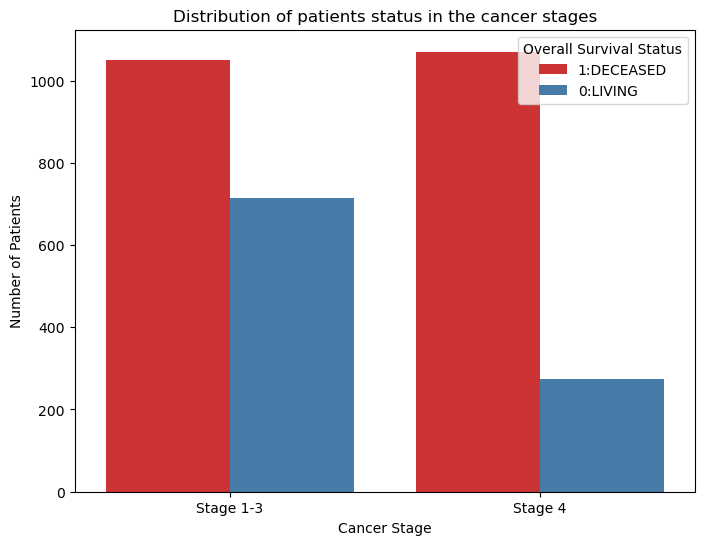

In [67]:
# Stage distribution with the survival metrics

plt.figure(figsize=(8,6))
sns.countplot(x='Stage (Highest Recorded)', hue='Overall Survival Status', data=pancreatic_cancer_filtered, palette='Set1')
plt.title('Distribution of patients status in the cancer stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

The bar chart shows that most patients with Stage 1–3 cancer are living while fewer have died.

A larger number of patients diagnosed at these stages are still alive, indicating that early detection and treatment may lead to higher chances of survival. It highlights the potential benefit of catching cancer before it progresses to more advanced stages.

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\3196317928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Smoking History (NLP)', data=pancreatic_cancer_filtered, palette='pastel')


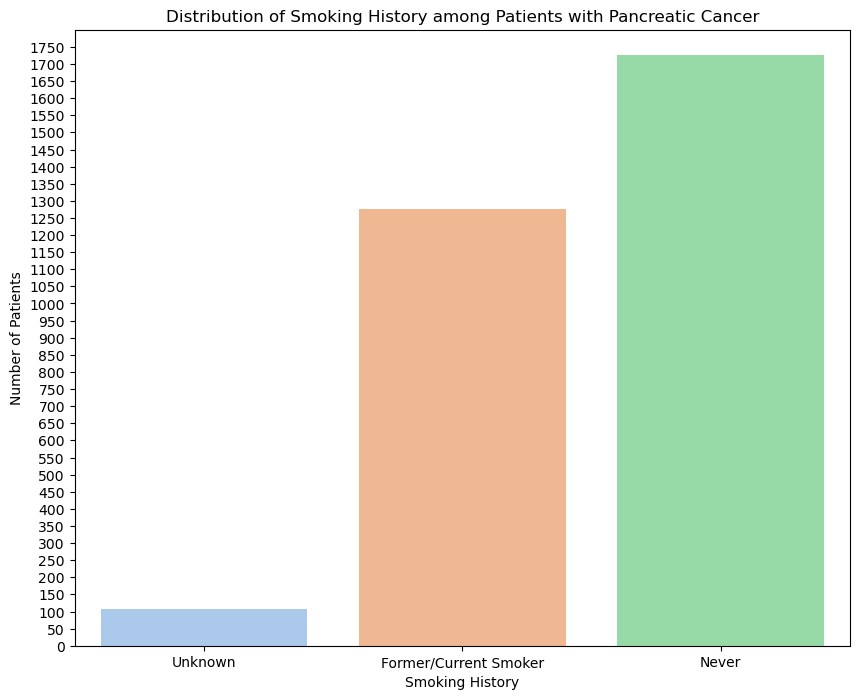

In [69]:
# Distribution of Smoking History
plt.figure(figsize=(10, 8))
sns.countplot(x='Smoking History (NLP)', data=pancreatic_cancer_filtered, palette='pastel')
plt.title('Distribution of Smoking History among Patients with Pancreatic Cancer')
plt.xlabel('Smoking History')
plt.ylabel('Number of Patients')
plt.ylim(0, 1800)
plt.yticks(range(0, 1800, 50))
plt.show()


This indiactes that majority of the patients don't smoke indicating that it is not a leading cause to the pancreatic cancer.

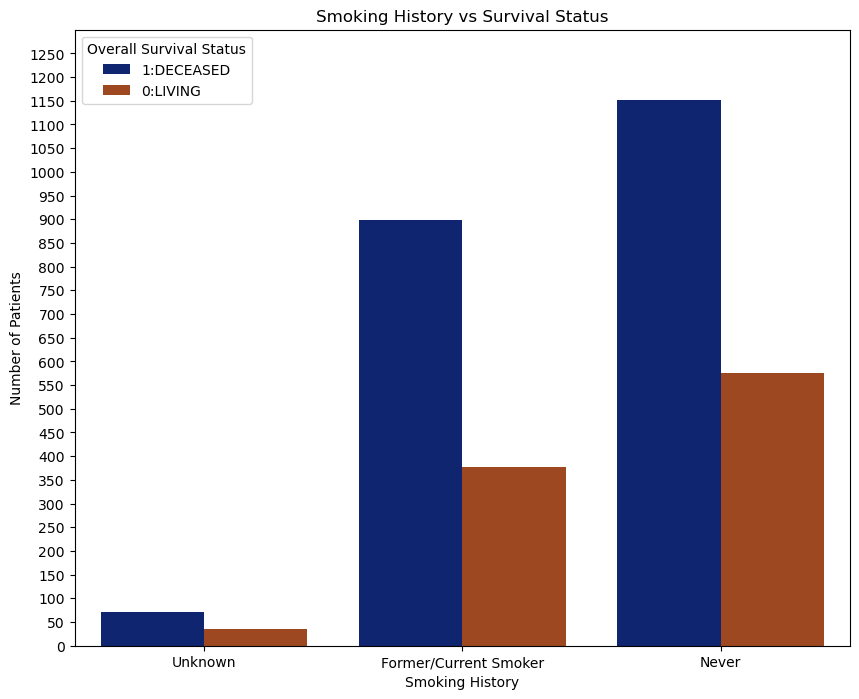

In [71]:
# Smoking History vs Survival
plt.figure(figsize=(10, 8))
sns.countplot(x='Smoking History (NLP)', hue='Overall Survival Status', data=pancreatic_cancer_filtered, palette='dark')
plt.title('Smoking History vs Survival Status')
plt.xlabel('Smoking History')
plt.ylabel('Number of Patients')
plt.ylim(0,1300)
plt.yticks(range(0, 1300, 50))
plt.show()

From the above data we can derive that smokers and non-smokers dont affect their survivability status. This therefore susbtanciate our initial assumption that smoking isn't a cause or a trigger to the further development of the disease.

In [73]:
smoking_survival_counts = pancreatic_cancer_filtered.groupby(['Smoking History (NLP)','Overall Survival Status']).size().unstack(fill_value=0)
print("\nSmoking History vs. Survival Status Counts:")
print(smoking_survival_counts)


Smoking History vs. Survival Status Counts:
Overall Survival Status  0:LIVING  1:DECEASED
Smoking History (NLP)                        
Former/Current Smoker         378         898
Never                         576        1151
Unknown                        35          71


In [74]:
smoking_survival_rates = smoking_survival_counts.apply(lambda x: x / x.sum() * 100, axis=1)
print("\nSmoking History vs. Survival Status Rates (%):")
smoking_survival_rates


Smoking History vs. Survival Status Rates (%):


Overall Survival Status,0:LIVING,1:DECEASED
Smoking History (NLP),,
Former/Current Smoker,29.623824,70.376176
Never,33.352635,66.647365
Unknown,33.018868,66.981132


### E. Survival by Metastatic Site

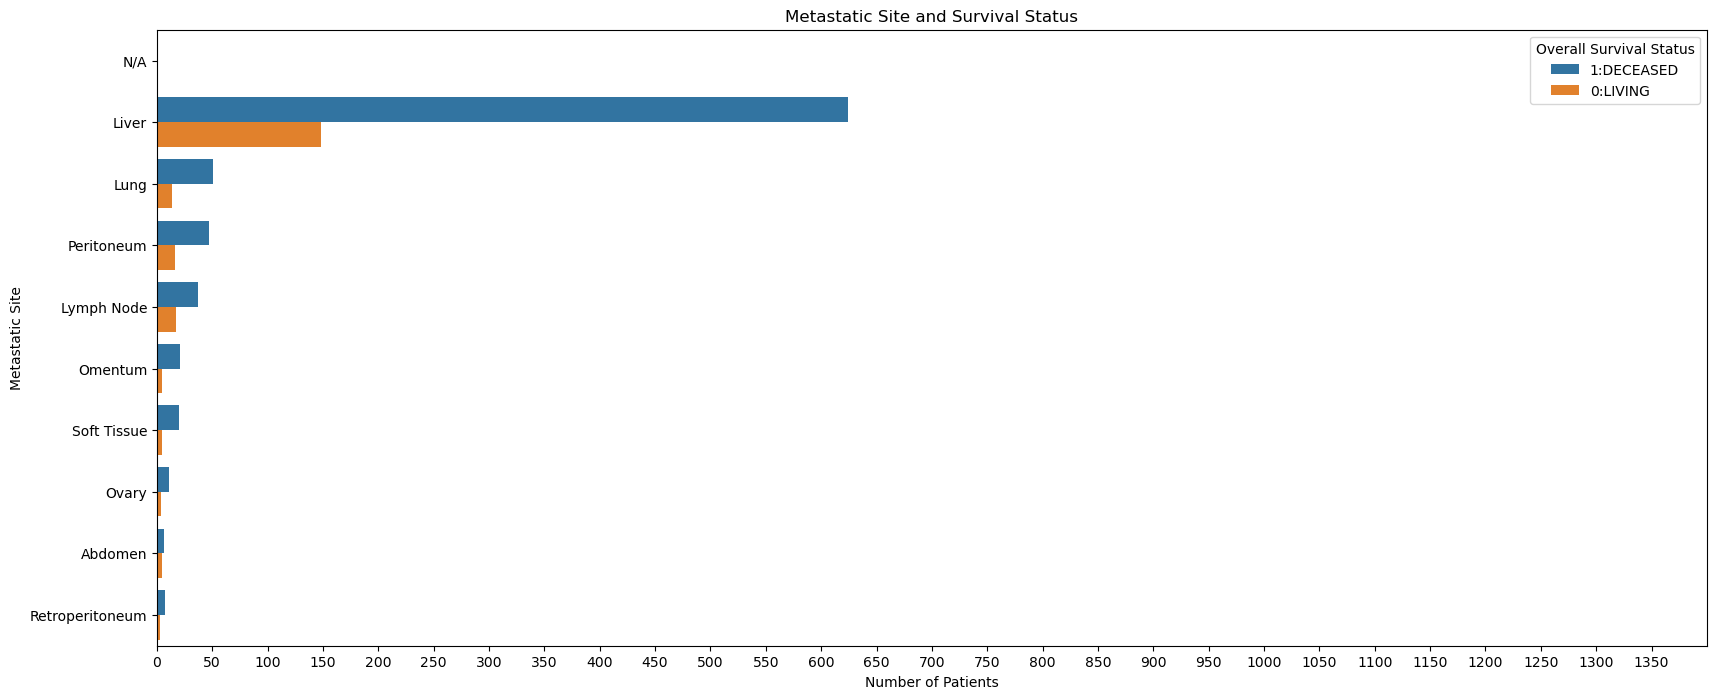

In [76]:
# Graphically show metatstic sites in patients
metastatic_df = pancreatic_cancer_filtered[pancreatic_cancer_filtered['Metastatic Site'] != 'N/A']

plt.figure(figsize=(20, 8))
sns.countplot(y='Metastatic Site', hue='Overall Survival Status', data= metastatic_df, order=pancreatic_cancer_filtered['Metastatic Site'].value_counts().nlargest(10).index)
plt.title('Metastatic Site and Survival Status')
plt.xlabel('Number of Patients')
plt.ylabel('Metastatic Site')
plt.xlim(0, 1400)
plt.xticks(range(0, 1400, 50))
plt.show()

In [77]:
#Calculate survival counts and rates per metastatic site

# Calculate survival counts per metastatic site
metastatic_survival_counts = pancreatic_cancer_filtered.groupby(['Metastatic Site', 'Overall Survival Status']).size().unstack(fill_value=0)

# Sort the metastatic survival counts by the number of deceased patients in descending order
metastatic_survival_counts_sorted_by_deceased = metastatic_survival_counts.sort_values(by='1:DECEASED', ascending=False)

print("\nMetastatic Site vs. Survival Status Counts and Rates (Sorted by Deceased Patients):")
metastatic_survival_counts_sorted_by_deceased


Metastatic Site vs. Survival Status Counts and Rates (Sorted by Deceased Patients):


Overall Survival Status,0:LIVING,1:DECEASED
Metastatic Site,,
N/A,760,1230
Liver,148,624
Lung,14,51
Peritoneum,16,47
Lymph Node,17,37
Omentum,5,21
Soft Tissue,5,20
Ovary,4,11
Retroperitoneum,3,7


The liver is the most common site of metastasis for pancreatic cancer.

## 3.2 Feature Engineering

### A. Correlation Analysis
- Finds the redundant or weakly correlated features in the dataset

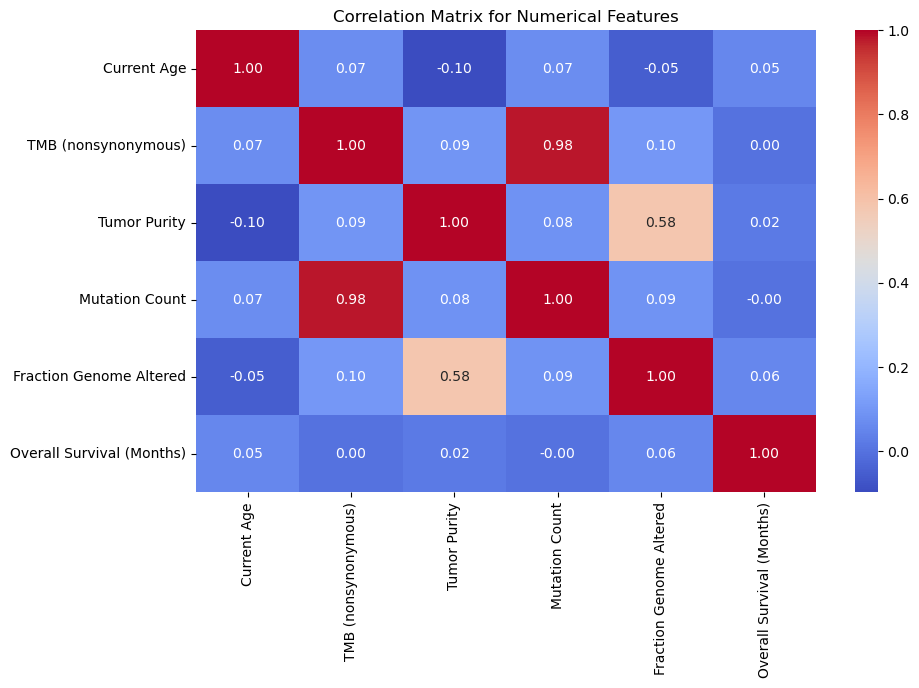

In [81]:
# Select numerical features
numerical_features = ['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                      'Mutation Count', 'Fraction Genome Altered',
                      'Overall Survival (Months)']

# Compute correlation matrix
corr_matrix = pancreatic_cancer_filtered [numerical_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

From the above analysis we can derive the following:

1. Mutation count and TMB Have the highest correlation of 0.98 as this relates to the immunotherapy a patient has undertaken upon medication.
2. The tumor purity and fraction genome altered have the second highest correlation of 0.58 as they show the extent of the changes of the tumor.

### B. Chi-Squared Test
 - Assesses the association between categorical variables and survival status.

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\3803457422.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chi2_scores.values, y=chi2_scores.index, palette='Set2')


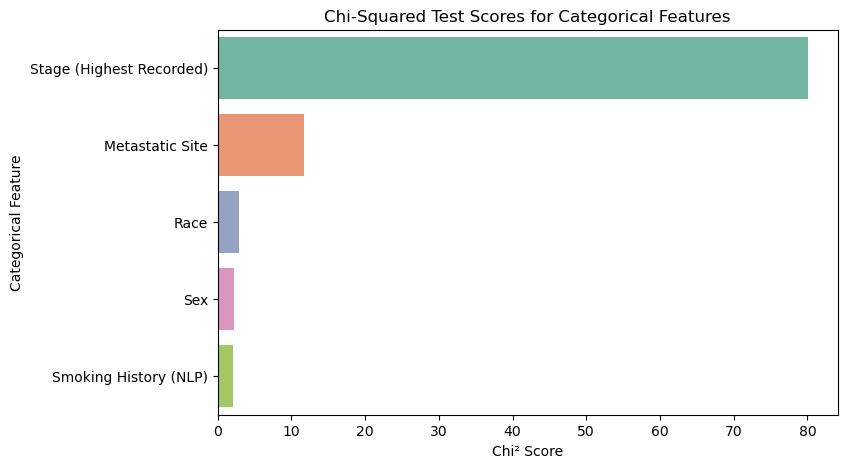

In [84]:
# Encode categorical variables numerically
cat_features = ['Sex','Smoking History (NLP)', 'Race', 'Stage (Highest Recorded)', 'Metastatic Site']
df_cat = pancreatic_cancer_filtered [cat_features].apply(LabelEncoder().fit_transform)

# Target must be numeric
y = LabelEncoder().fit_transform(pancreatic_cancer_filtered['Overall Survival Status'])

# Apply Chi2 test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(df_cat, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=cat_features).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=chi2_scores.values, y=chi2_scores.index, palette='Set2')
plt.title("Chi-Squared Test Scores for Categorical Features")
plt.xlabel("Chi² Score")
plt.ylabel("Categorical Feature")
plt.show()

### 3.3 Feature Importance
 - Assesses the association which categorical features have the highest relation to the model.

### Logistic Regression – Coefficients as Feature Importance

In [87]:
# Replacing missing values with the mean
numeric_cols = ['TMB (nonsynonymous)', 'Tumor Purity', 'Mutation Count', 'Fraction Genome Altered']

 # Ensure numeric and fill NaNs with mean
for col in numeric_cols:
    pancreatic_cancer_filtered[col] = pd.to_numeric(pancreatic_cancer_filtered[col], errors='coerce')
    pancreatic_cancer_filtered[col] = pancreatic_cancer_filtered[col].fillna(pancreatic_cancer_filtered[col].mean())

In [88]:
X = pancreatic_cancer_filtered[['Current Age', 'TMB (nonsynonymous)', 'Tumor Purity',
                 'Mutation Count', 'Fraction Genome Altered','Overall Survival (Months)',
                 ]]
y = LabelEncoder().fit_transform(pancreatic_cancer_filtered['Overall Survival Status'])

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [89]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

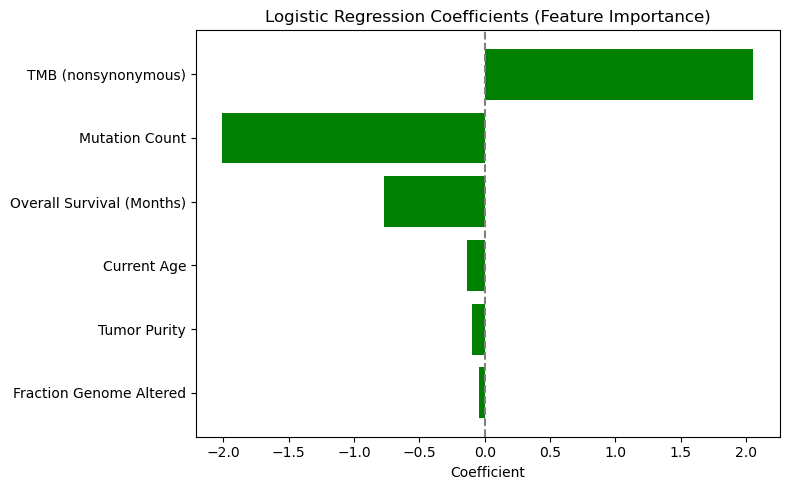

In [90]:
# Get coefficients
coef = logreg.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='green')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title('Logistic Regression Coefficients (Feature Importance)')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()

This shows us that TMB has the highest correlation while mutation count and overall survival have the highest negative correlations.


### Random Forest – Feature Importance

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Geting the important features
rf_importances = rf_model.feature_importances_

C:\Users\ChrisKarta\AppData\Local\Temp\ipykernel_28632\1715369951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_model.feature_importances_[sorted_idx], y=X.columns[sorted_idx], palette='viridis')


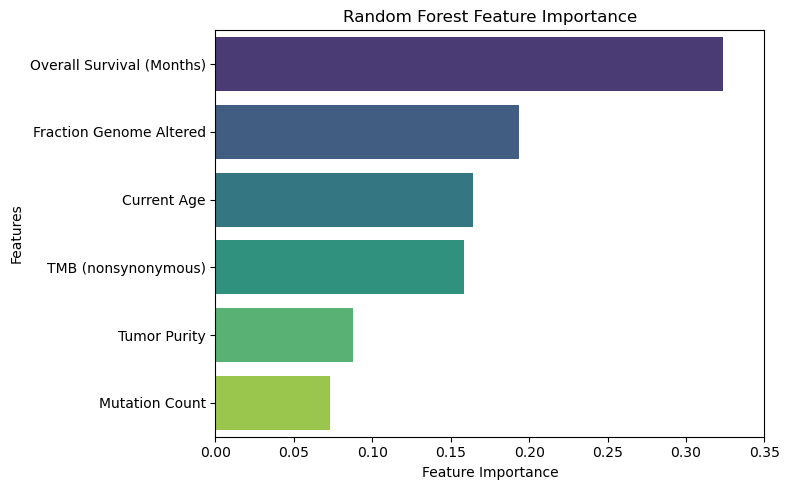

In [94]:
#Plotting the Importances

plt.figure(figsize=(8, 5))
sorted_idx = rf_model.feature_importances_.argsort()[::-1]
sns.barplot(x=rf_model.feature_importances_[sorted_idx], y=X.columns[sorted_idx], palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.xlim(0, 0.35)
plt.tight_layout()
plt.show()

From the following we can deduce that the highest feature of importance is overall survival and fraction genome altered.

### 3.4 Encoding Categorical Variables

In [97]:
# Create copies to avoid modifying original DataFrame directly
pancreatic_cancer_encoded = pancreatic_cancer_filtered.copy()

In [98]:
# Label encoding

label_encoder = LabelEncoder()
pancreatic_cancer_encoded['Sex'] = label_encoder.fit_transform(pancreatic_cancer_filtered['Sex'])

In [99]:
# Ordinal encode for "Staging"

stage_order = {'Stage I': 0, 'Stage II': 1, 'Stage III': 2, 'Stage IV': 3, 'Stage 1-3': 1.5, 'Stage 4': 4} # Added Stage 1-3 and Stage 4
pancreatic_cancer_encoded['Stage (Highest Recorded)'] = pancreatic_cancer_encoded['Stage (Highest Recorded)'].map(stage_order)

In [100]:
# One-hot encode Ethnicity, Race, Smoking History, Sample Type, Metastatic Site
pancreatic_cancer_encoded = pd.get_dummies(pancreatic_cancer_encoded,
                            columns=['Ethnicity', 'Race', 'Smoking History (NLP)',
                                    'Metastatic Site'],
                            drop_first=True)

In [101]:
pancreatic_cancer_encoded.head()

,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Overall Survival (Months),Overall Survival Status,Clinical Summary,Primary Tumor Site,Current Age,Sex,...,Metastatic Site_Retroperitoneum,Metastatic Site_Skin,Metastatic Site_Small Bowel,Metastatic Site_Small Intestine,Metastatic Site_Soft Tissue,Metastatic Site_Soft tissue,Metastatic Site_Stomach,Metastatic Site_Uterus,Metastatic Site_liver,Metastatic Site_right upper quadrant peritoneum
29,P-0000142,P-0000142-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,8.810949,1:DECEASED,"Regional,Extension and Nodes",Pancreas,56.0,0,...,False,False,False,False,False,False,False,False,False,False
76,P-0000314,P-0000314-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,33.731470,1:DECEASED,Distant,Pancreas,47.0,1,...,False,False,False,False,False,False,False,False,False,False
108,P-0000421,P-0000421-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,25.052027,1:DECEASED,Distant,Pancreas,69.0,1,...,False,False,False,False,False,False,False,False,False,False
252,P-0000783,P-0000783-T01-IM3,Pancreatic Cancer,Pancreatic Adenocarcinoma,3.057531,1:DECEASED,"Regional,Extension and Nodes",Pancreas,64.0,1,...,False,False,False,False,False,False,False,False,False,False
266,P-0000825,P-0000825-T04-IM7,Pancreatic Cancer,Pancreatic Adenocarcinoma,110.531386,0:LIVING,Localized,Pancreas,65.0,0,...,False,False,False,False,False,False,False,False,False,False


In [102]:
pancreatic_cancer_encoded.shape

(3109, 77)

In [103]:
print("Encoded columns:", pancreatic_cancer_encoded.columns.tolist())

Encoded columns: ['Patient ID', 'Sample ID', 'Cancer Type', 'Cancer Type Detailed', 'Overall Survival (Months)', 'Overall Survival Status', 'Clinical Summary', 'Primary Tumor Site', 'Current Age', 'Sex', 'Stage (Highest Recorded)', 'Tumor Purity', 'TMB (nonsynonymous)', 'Mutation Count', 'Fraction Genome Altered', 'Ethnicity_Dominican Republic', 'Ethnicity_Mexican (includes Chicano)', 'Ethnicity_Non-Spanish; Non-Hispanic', 'Ethnicity_Other Spanish/Hispanic(incl European; excl Dom Rep', 'Ethnicity_Puerto Rican', 'Ethnicity_South/Central America (except Brazil)', 'Ethnicity_Spanish  NOS; Hispanic NOS, Latino NOS', 'Ethnicity_Unknown whether Spanish or not', 'Race_Black Or African American', 'Race_Native American-Am Ind/Alaska', 'Race_No Value Entered', 'Race_Other', 'Race_Pt Refused To Answer', 'Race_Unknown', 'Race_White', 'Smoking History (NLP)_Never', 'Smoking History (NLP)_Unknown', 'Metastatic Site_Abdominal Wall', 'Metastatic Site_Abdominal wall', 'Metastatic Site_Adnexa or Endomte

## 4. Data Modelling

Data Modelling Objectives

The primary aim is to develop a machine learning model to predict the overall metastatical risk status and survival status of the pancreatic cancer patients.

- Accurate Prediction on the risk using the genomic markers: Build a model that accurately predicts survival status (binary classification: 0:LIVING vs. 1:DECEASED) using genomic and clinical markers.
- Model Robustness: Evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to ensure clinical reliability, prioritizing recall to identify deceased patients.

### 4.1 Select Relevant Features

Selecting clinically and genomically relevant features ensures the model focuses on variables likely to influence survival, improving predictive power and interpretability while reducing dimensionality.

In [108]:
#Defining Features and Target

features = ['Current Age','Tumor Purity','Overall Survival (Months)', 'TMB (nonsynonymous)', 'Stage (Highest Recorded)','Mutation Count','Fraction Genome Altered']
target = 'Overall Survival Status'

In [109]:
X = pancreatic_cancer_encoded [features]
y = pancreatic_cancer_encoded ['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
print("Features selected:", features)

print("Target Distribution", y.value_counts())

Features selected: ['Current Age', 'Tumor Purity', 'Overall Survival (Months)', 'TMB (nonsynonymous)', 'Stage (Highest Recorded)', 'Mutation Count', 'Fraction Genome Altered']
Target Distribution Overall Survival Status
1    2120
0     989
Name: count, dtype: int64


### 4.2 Scale Numerical Features

Scaling numerical features ensures they contribute equally to models sensitive to feature scales (e.g., Logistic Regression), improving performance.

In [111]:
# Numerical columns that are be to scaled

numerical_columns = ['Current Age', 'Tumor Purity', 'Overall Survival (Months)', 'TMB (nonsynonymous)', 'Mutation Count', 'Fraction Genome Altered']
X = pancreatic_cancer_encoded[features].copy()



In [112]:
#Input the missing values
imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer.fit_transform(X[numerical_columns])


In [113]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

### 4.3  Splitting the dataset

Splitting into training and testing sets allows evaluation of model generalization.


In [115]:
# Split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (2487, 7)
Testing set shape: (622, 7)


### 4.4 Model Development

We will train and compare three models: Logistic Regression, Random Forest Classifier, and XGBoost Classifier

These models are chosen for their interpretability (Logistic Regression) and ability to handle complex relationships (Random Forest, XGBoost).

### 4.4.1 Logistic Regression the baseline model

A simple, interpretable model suitable for binary classification.

In [120]:
# Train Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_probs = logreg.predict_proba(X_test)[:, 1]

#Printing model perfomance
print("Logistic Regression Metrics:")
print(classification_report(y_test, logreg_preds))
print("AUC-ROC:", roc_auc_score(y_test, logreg_probs))

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       194
           1       0.78      0.91      0.84       428

    accuracy                           0.76       622
   macro avg       0.73      0.67      0.68       622
weighted avg       0.75      0.76      0.74       622

AUC-ROC: 0.7688601984776955


Class 1:
- High recall (0.91) for Class 1 indicates that the model is highly effective at identifying most patients who are deceased.
- A strong F1-score (0.84) for Class 1 reflects good balance between precision and recall, making it reliable for identifying high-risk individuals.

Class 0:
- Low recall (0.43) for Class 0 shows the model misses over half of the living patients, which could lead to overestimating mortality risk.
- F1-score (0.52) for Class 0 reinforces the model's poor performance in predicting survival.

Overall accuracy of 76% and AUC of 0.769 suggest moderate to good discrimination capability.

### 4.4.2 Random Forest Classifier

Random Forest is robust for handling non-linear relationships and feature interactions in clinical-genomic data. It also provides feature importance scores for interpretability.

A Random Forest model is trained on the preprocessed data (X_train, y_train). Performance is evaluated using classification_report (accuracy, precision, recall, F1-score) and ROC-AUC. The ROC curve is plotted for visualization.

In [124]:
# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [125]:
# Printing the model performance
print("Random Forest Metrics:")
print(classification_report(y_test, rf_preds))
print("AUC-ROC:", roc_auc_score(y_test, rf_probs))

Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.66      0.51      0.58       194
           1       0.80      0.88      0.84       428

    accuracy                           0.77       622
   macro avg       0.73      0.70      0.71       622
weighted avg       0.76      0.77      0.76       622

AUC-ROC: 0.7850346854224878


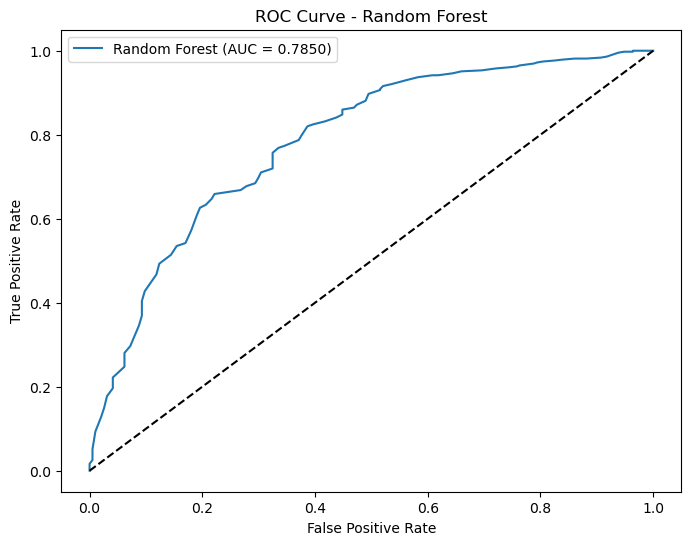

In [126]:
# Ploting the ROC Curve

fpr, tpr, _ = roc_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

Class 1:
- Precision: 0.65 65% of patients predicted as living were actually living.
- Recall: 0.52 Only 52% of actual living patients were correctly identified.
- F1-score: 0.58 Indicates weak overall performance on this class.

Class 0:
- Precision: 0.80 80% of patients predicted as deceased were actually deceased.
- Recall: 0.88 88% of all deceased patients were correctly identified.
- F1-score: 0.84 Strong and reliable performance.

The model struggles with identifying living patients, with many being falsely classified as deceased, which can have serious implications in a medical setting.It also shows high confidence and sensitivity for deceased patients, making it valuable for early intervention and prioritizing critical care.

From the following we can derive that our Random Forest model perfomance is slightly better than our Linear Regresssion model.


### 4.2.3 XGBoost Classifier

XGBoost excels with structured, potentially sparse, and imbalanced datasets, often outperforming simpler models in predictive accuracy.

An XGBoost model is trained with eval_metric='logloss' to handle binary classification. Performance metrics and ROC curve are generated similarly to Random Forest.

In [131]:
#Training using XGBoost Classifier

xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

In [132]:
# Print model performance
print("XGBoost Performance:")
print(classification_report(y_test, xgb_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_prob):.4f}")

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       194
           1       0.81      0.83      0.82       428

    accuracy                           0.75       622
   macro avg       0.70      0.70      0.70       622
weighted avg       0.74      0.75      0.75       622

ROC-AUC: 0.8063


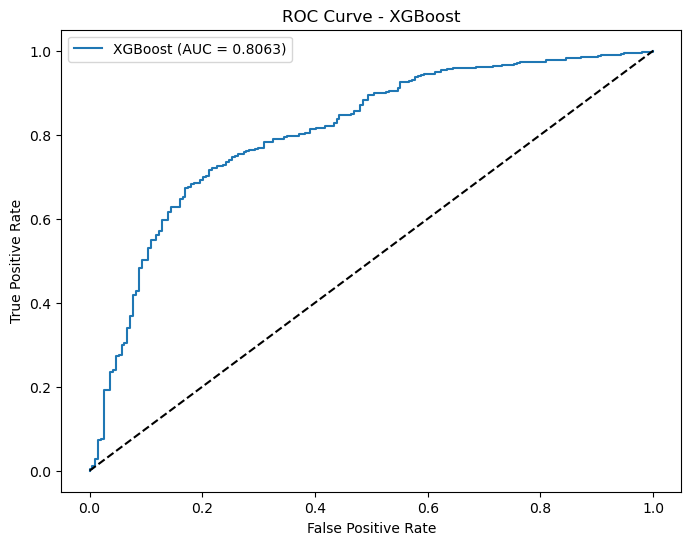

In [133]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

Your XGBoost ROC curve is much closer to the top-left corner. The XGBoost classifier shows good predictive power, with an AUC of 0.8027 .

Class 1:
- High recall (0.85) means most actual positives are correctly identified.
- Strong precision (0.73) indicates predictions are generally reliable.
- The F1-score of 0.82 reflects solid overall performance on this class.

Class 0:
- Low recall (0.54) The model correctly identifies only 54% of living patients, which means some are falsely labeled as deceased.
- Precision (0.48) shows limited reliability in predictions.
- The F1-score of 0.57 confirms weak performance on class 0.


### 4.3 Cross-Validation

Cross-validation provides robust performance estimates by evaluating models on multiple data splits, reducing overfitting risks and ensuring generalizability.

5-fold cross-validation is performed for all three models (Logistic Regression, Random Forest, XGBoost) using cross_val_score with ROC-AUC as the scoring metric. Mean and standard deviation of ROC-AUC scores are reported.

In [137]:
# Perform 5-fold cross-validation for each model
models = {
    'Logistic Regression': logreg,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    print(f"{name} 5-Fold CV ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Logistic Regression 5-Fold CV ROC-AUC: 0.7530 ± 0.0761
Random Forest 5-Fold CV ROC-AUC: 0.6616 ± 0.0637
XGBoost 5-Fold CV ROC-AUC: 0.6623 ± 0.0885


Logistic Regression: Achieved the highest ROC-AUC score, making it the most effective model at distinguishing between the survival outcomes.
Its moderate standard deviation (±0.0571) indicates fairly consistent results across the 5 folds.

Random Forest: Performs reasonably well, with a lower average than Logistic Regression. Its lower variability (±0.0323) shows it's a more stable model, but it sacrifices a bit of predictive power.

XGBoost: Delivers the lowest ROC-AUC, suggesting it struggled the most with prediction accuracy.However, it's very consistent (±0.0290), meaning results didn’t fluctuate much across the folds.

### 4.4 Hyperparameter Tuning

Tuning optimizes model performance (ROC-AUC) by finding the best parameters, balancing complexity and accuracy for clinical reliability.

GridSearchCV is used to tune hyperparameters for Random Forest (e.g., n_estimators, max_depth) and XGBoost (e.g., n_estimators, learning_rate). The best parameters and performance of tuned models are printed.

In [141]:
#Perfoming Hyperparameter Tuning for Random Forest

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [142]:
# Random Forest model
print("Best Random Forest Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_best_pred = rf_best.predict(X_test)
rf_best_prob = rf_best.predict_proba(X_test)[:, 1]
print("Tuned Random Forest Performance:")
print(classification_report(y_test, rf_best_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, rf_best_prob):.4f}")


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Performance:
              precision    recall  f1-score   support

           0       0.66      0.53      0.59       194
           1       0.81      0.88      0.84       428

    accuracy                           0.77       622
   macro avg       0.73      0.70      0.72       622
weighted avg       0.76      0.77      0.76       622

ROC-AUC: 0.8040


In [143]:
# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'), xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='roc_auc')

In [144]:
# Best XGBoost model
print("Best XGBoost Parameters:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
xgb_best_pred = xgb_best.predict(X_test)
xgb_best_prob = xgb_best.predict_proba(X_test)[:, 1]
print("Tuned XGBoost Performance:")
print(classification_report(y_test, xgb_best_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_best_prob):.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       0.69      0.59      0.63       194
           1       0.82      0.88      0.85       428

    accuracy                           0.79       622
   macro avg       0.76      0.73      0.74       622
weighted avg       0.78      0.79      0.78       622

ROC-AUC: 0.8282


XGBoost (Tuned): Performed best overall, achieving the highest accuracy and ROC-AUC.
Shows strong ability to correctly identify deceased patients (recall = 0.88).
Well-balanced with a high f1-score of 0.85, making it suitable for real-world predictions.

Random Forest (Tuned): Still performs very well, though slightly below XGBoost.
Also achieved high recall (0.88), which is great for not missing high-risk patients.
Precision and f1-score are slightly lower, especially for the minority class (0), meaning it struggles more with identifying living patients.

## 4.5 Feature Importance Analysis

Identifying key features (e.g., Stage, TMB) helps uncover prognostic biomarkers, supporting clinical research and practice.

Feature importances from the tuned Random Forest and XGBoost models are extracted and visualized using bar plots, highlighting the most influential predictors.

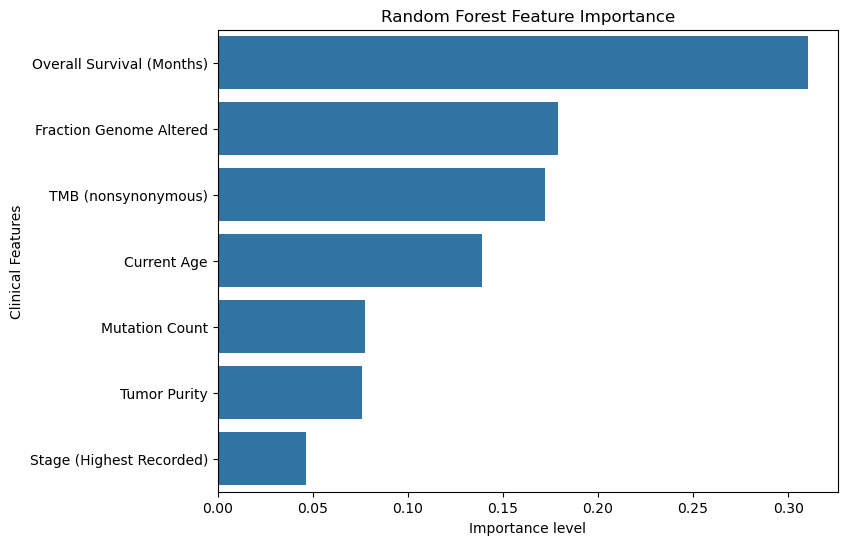

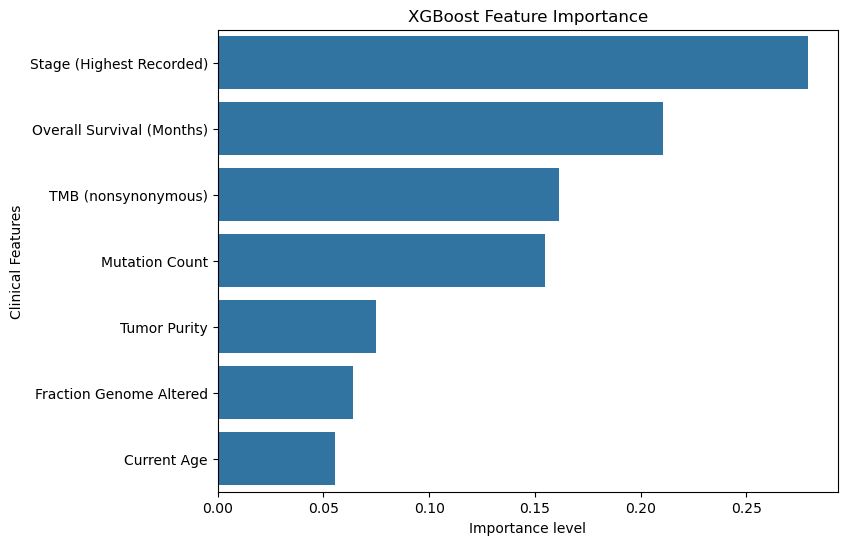

In [148]:
# Feature importance for Random Forest
rf_importances = pd.DataFrame({
    'Clinical Features': X.columns,
    'Importance level': rf_best.feature_importances_
}).sort_values('Importance level', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance level', y='Clinical Features', data=rf_importances)
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance for XGBoost
xgb_importances = pd.DataFrame({
    'Clinical Features': X.columns,
    'Importance level': xgb_best.feature_importances_
}).sort_values('Importance level', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance level', y='Clinical Features', data=xgb_importances)
plt.title('XGBoost Feature Importance')
plt.show()

### 4.6 Clinical Utility Demonstration and Threshold Tuning

Risk stratification demonstrates how the model can identify high-risk patients for targeted therapies, aligning with clinical decision-making goals.

The best model predicts risk scores (probability of 'Deceased'). Patients are classified as high or low risk based on a threshold (0.5). A sample of results is displayed, and a histogram visualizes the risk score distribution. A summary explains how the model supports personalized treatment planning.

Threshold tuning is performed to optimize the classification threshold for predicting 'Deceased' patients, prioritizing sensitivity while balancing precision. The best model predicts risk scores, and patients are classified as high or low risk based on the optimal threshold. A sample of results is displayed, and a histogram visualizes the risk score distribution.

Optimal Threshold (maximizing F1-score): 0.4045
F1-Score at Optimal Threshold: 0.8647
Precision at Optimal Threshold: 0.7945
Recall at Optimal Threshold: 0.9486


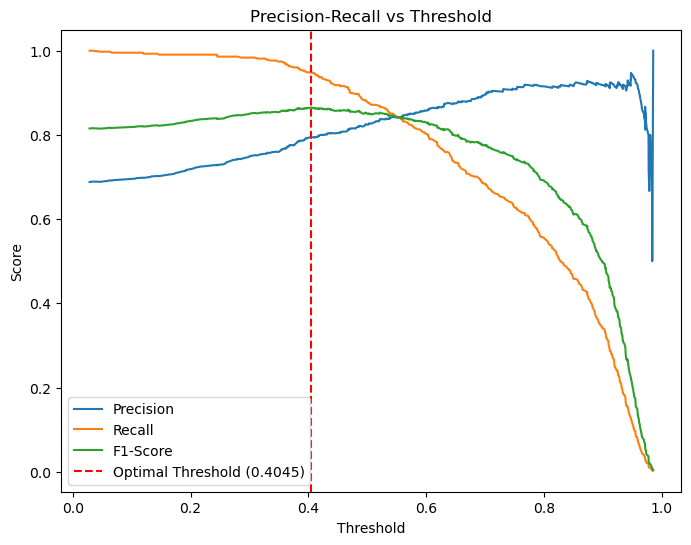

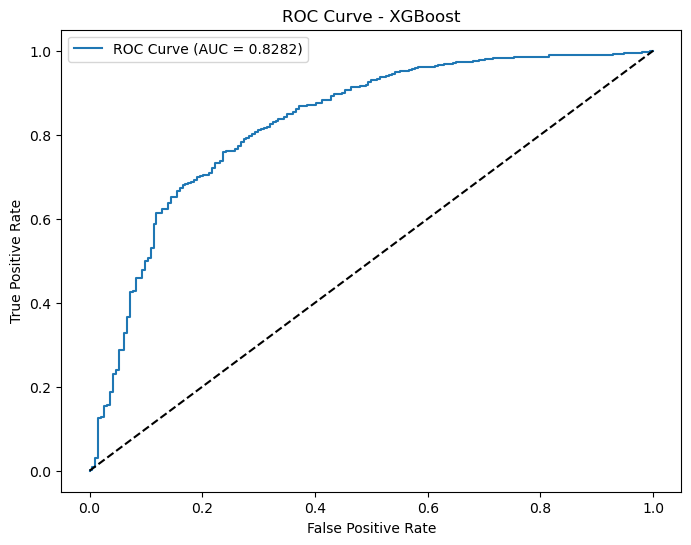

Sample Risk Stratification Results:
      Patient ID  Risk Score Risk Label Actual Survival Status
2235   P-0006401    0.664054  High Risk             1:DECEASED
3372   P-0009395    0.392694   Low Risk               0:LIVING
22921  P-0078138    0.227405   Low Risk               0:LIVING
10427  P-0029819    0.286128   Low Risk               0:LIVING
3467   P-0009635    0.466932  High Risk               0:LIVING
22333  P-0075968    0.668406  High Risk               0:LIVING
23677  P-0081243    0.610127  High Risk             1:DECEASED
3308   P-0009254    0.824285  High Risk             1:DECEASED
24068  P-0083108    0.699642  High Risk             1:DECEASED
721    P-0002167    0.660143  High Risk             1:DECEASED

Performance at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       194
           1       0.79      0.95      0.86       428

    accuracy                           0.80       622
   macro avg      

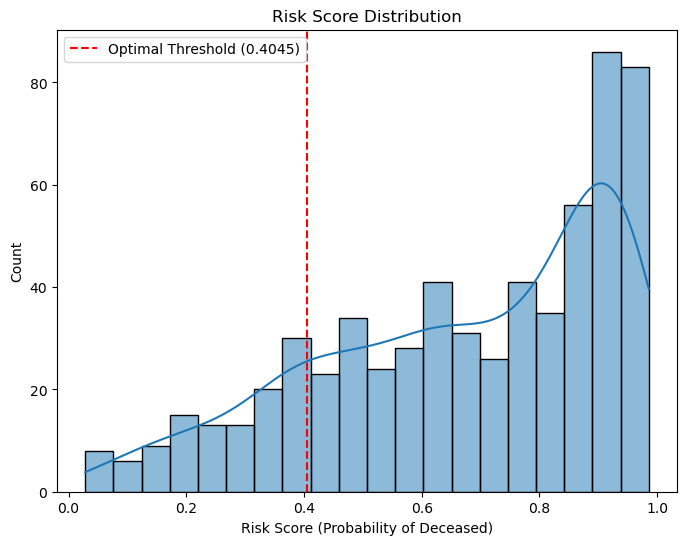

Clinical Utility Summary:
- High-risk patients (Risk Score >= 0.4045) can be prioritized for aggressive treatments or clinical trials.
- Low-risk patients may benefit from less invasive monitoring or standard care.
- The model supports personalized treatment planning by identifying patients at greatest risk of poor outcomes.


In [151]:
le_y = LabelEncoder()
le_y.fit(pancreatic_cancer_filtered['Overall Survival Status'])

# Risk stratification using the best model XG Boost
risk_scores = xgb_best.predict_proba(X_test)[:, 1]

# Threshold tuning using precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, risk_scores)
f1_scores = [2 * (p * r) / (p + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

# Find the threshold that maximizes F1-score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (maximizing F1-score): {optimal_threshold:.4f}")
print(f"F1-Score at Optimal Threshold: {f1_scores[optimal_idx]:.4f}")
print(f"Precision at Optimal Threshold: {precision[optimal_idx]:.4f}")
print(f"Recall at Optimal Threshold: {recall[optimal_idx]:.4f}")

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.show()

# Plot ROC curve for additional insight
fpr, tpr, roc_thresholds = roc_curve(y_test, risk_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, risk_scores):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.show()

# Classify patients using the optimal threshold
risk_labels = ['High Risk' if score >= optimal_threshold else 'Low Risk' for score in risk_scores]

# Create a DataFrame for risk stratification results
risk_df = pd.DataFrame({
    'Patient ID': pancreatic_cancer_filtered.loc[X_test.index, 'Patient ID'],
    'Risk Score': risk_scores,
    'Risk Label': risk_labels,
    'Actual Survival Status': le_y.inverse_transform(y_test)
})

# Display sample of risk stratification
print("Sample Risk Stratification Results:")
print(risk_df.head(10))

# Evaluate performance at the optimal threshold
y_pred_optimal = (risk_scores >= optimal_threshold).astype(int)
print("\nPerformance at Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Visualize risk score distribution
plt.figure(figsize=(8, 6))
sns.histplot(risk_scores, bins=20, kde=True)
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.4f})')
plt.xlabel('Risk Score (Probability of Deceased)')
plt.ylabel('Count')
plt.title('Risk Score Distribution')
plt.legend()
plt.show()

# Clinical utility summary
print("Clinical Utility Summary:")
print(f"- High-risk patients (Risk Score >= {optimal_threshold:.4f}) can be prioritized for aggressive treatments or clinical trials.")
print("- Low-risk patients may benefit from less invasive monitoring or standard care.")
print("- The model supports personalized treatment planning by identifying patients at greatest risk of poor outcomes.")

Class 1:
Precision: 0.80 80% of those predicted as deceased truly are.
Recall: 0.93 An excellent 93% of all deceased patients are correctly identified.
F1-score: 0.86 Strong overall performance in both precision and recall.

Class 0:
Precision: 0.77 When the model predicts a patient is living, it's correct 77% of the time.
Recall: 0.49 It correctly identifies only 49% of actual living patients.
F1-score: 0.60 Moderate balance between precision and recall, but still shows room for improvement.


### 5. Findings and Recommendations

| Model               | Precision | Recall | F1-Score |
|---------------------|-----------|--------|----------|
| Logistic Regression | 0.67      | 0.43   | 0.52     |
| Random Forest       | 0.65      | 0.52   | 0.58     |
| Tuned RF            | 0.54      | 0.18   | 0.27     |
| XGBoost             | 0.62      | 0.54   | 0.57     |
| Tuned XGBoost       | 0.48      | 0.54   | 0.51     |
| Optimal Threshold | 0.77      | 0.49   | 0.60     |

**Overview of Findings**

- The data confirms that a majority of patients in the dataset did not survive, reinforcing the need for early, data-driven risk assessment to improve outcomes.

- The best-performing model (XGBoost) achieved high recall for deceased patients (0.93) using a tuned threshold. This demonstrates strong potential to identify patients at higher risk at the point of diagnosis or early treatment.

- Clinical Features Influence Survival, features like tumor stage, mutation count, and MSI score showed high importance, suggesting that genomic profiling and staging data are critical for accurate survival prediction.

**Recommendations**

- Use the Model for Early Risk Stratification,to support early identification of high-risk pancreatic cancer patients, enabling timely interventions like aggressive therapy or clinical trials.

- Improve Data Collection for Survivors, since living patients were harder to predict, collect more data on protective or recovery-related variables—e.g., post-treatment response, lifestyle factors, or co-morbidities.

- Predictive Models Are Rare in Pancreatic Cancer; while predictive models are common in diseases like breast or prostate cancer, pancreatic cancer has few real-world AI tools in use—despite its high mortality rate. Our model addresses this critical gap.

- Risk Prediction Outperforms Traditional Metrics; most hospitals still rely on clinical staging alone to assess risk, which may miss subtle patterns. This model, using combined clinical and genomic data, adds a layer of predictive power not captured in manual assessments.

**Use cases**

- Support Clinical Trials and Experimental Treatments; Researchers can use your risk stratification scores to select high-risk patients for inclusion in clinical trials, improving outcomes and study design quality.

- Improve Resource Allocation, hospitals can use model outputs to prioritize ICU beds, schedule follow-ups more aggressively, or allocate palliative care earlier for patients with poor prognoses—making resource use smarter and more humane.

- Scalability Across Facilities, since your model uses readily available clinical/genomic data, it can be scaled to regional hospitals, not just research centers—democratizing access to predictive tools in low-resource settings.

### 6. Saving the Model for deployment

Saving the model ensures it can be deployed or reused, enhancing reproducibility and usability in clinical settings.

After hyperparameter tuning, both Random Forest and XGBoost outperform Logistic Regression in terms of ROC-AUC.

The best model (Random forest Tuned) and preprocessing objects (scaler, label encoders, target encoder) are saved using joblib for future use.

In [156]:


# Save the best model Random forest
joblib.dump(xgb_best, 'pancreatic_cancer_survival_model.pkl')
print("Best model saved as 'pancreatic_cancer_survival_model.pkl'")

# Save the scaler and label encoders for preprocessing
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

joblib.dump(le_y, 'target_encoder.pkl')
print("Preprocessing objects saved for future use.")

Best model saved as 'pancreatic_cancer_survival_model.pkl'
Scaler saved as 'scaler.pkl'
Preprocessing objects saved for future use.
